In [1]:
import os
import zipfile
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

import cv2
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# img = mpimg.imread('your_image.png')
# imgplot = plt.imshow(img)
# plt.show()

Populating the interactive namespace from numpy and matplotlib


In [63]:
os.chdir('C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/aoi/train_images') 
path = 'C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/aoi/train_images'

path = 'C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/aoi'
files = os.listdir(path)

In [64]:
files

['test.csv',
 'test_images',
 'test_images.zip',
 'train(vaild_label).csv',
 'train.csv',
 'train_images',
 'train_images.zip']

In [3]:
train_list = pd.read_csv("C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/aoi/train.csv", index_col=False)
# train_list["ID"][0]

image shape: (512, 512, 3)
data type: uint8
min: 109, max: 255


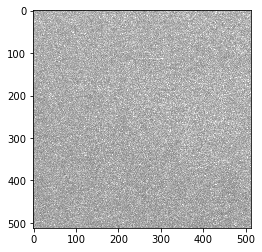

[[171 171 171]
 [154 154 154]
 [153 153 153]
 ...
 [189 189 189]
 [148 148 148]
 [158 158 158]]


In [4]:
os.chdir('C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/aoi/train_images') 
path = 'C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/aoi/train_images'
files = os.listdir(path)

train_img1 = files[0]
img = cv2.imread(train_img1)
print(f"image shape: {img.shape}")
print(f"data type: {img.dtype}")
print(f"min: {img.min()}, max: {img.max()}")
plt.imshow(img,cmap='gray')
plt.show()
print(img[0])

### 把同類別的圖片放到一個list

In [49]:
train_list.groupby(['Label']).size()

Label
0    674
1    492
2    100
3    378
4    240
5    644
dtype: int64

In [9]:
normal_list = train_list[train_list["Label"]==0]["ID"].values
void_list = train_list[train_list["Label"]==1]["ID"].values
horizontal_defect_list = train_list[train_list["Label"]==2]["ID"].values
vertical_defect_list = train_list[train_list["Label"]==3]["ID"].values
edge_defect_list = train_list[train_list["Label"]==4]["ID"].values
particle_list = train_list[train_list["Label"]==5]["ID"].values

label=[normal_list,void_list,horizontal_defect_list,vertical_defect_list,edge_defect_list,particle_list]

In [55]:
len(label[0])

674

### 查看每種類別的圖片

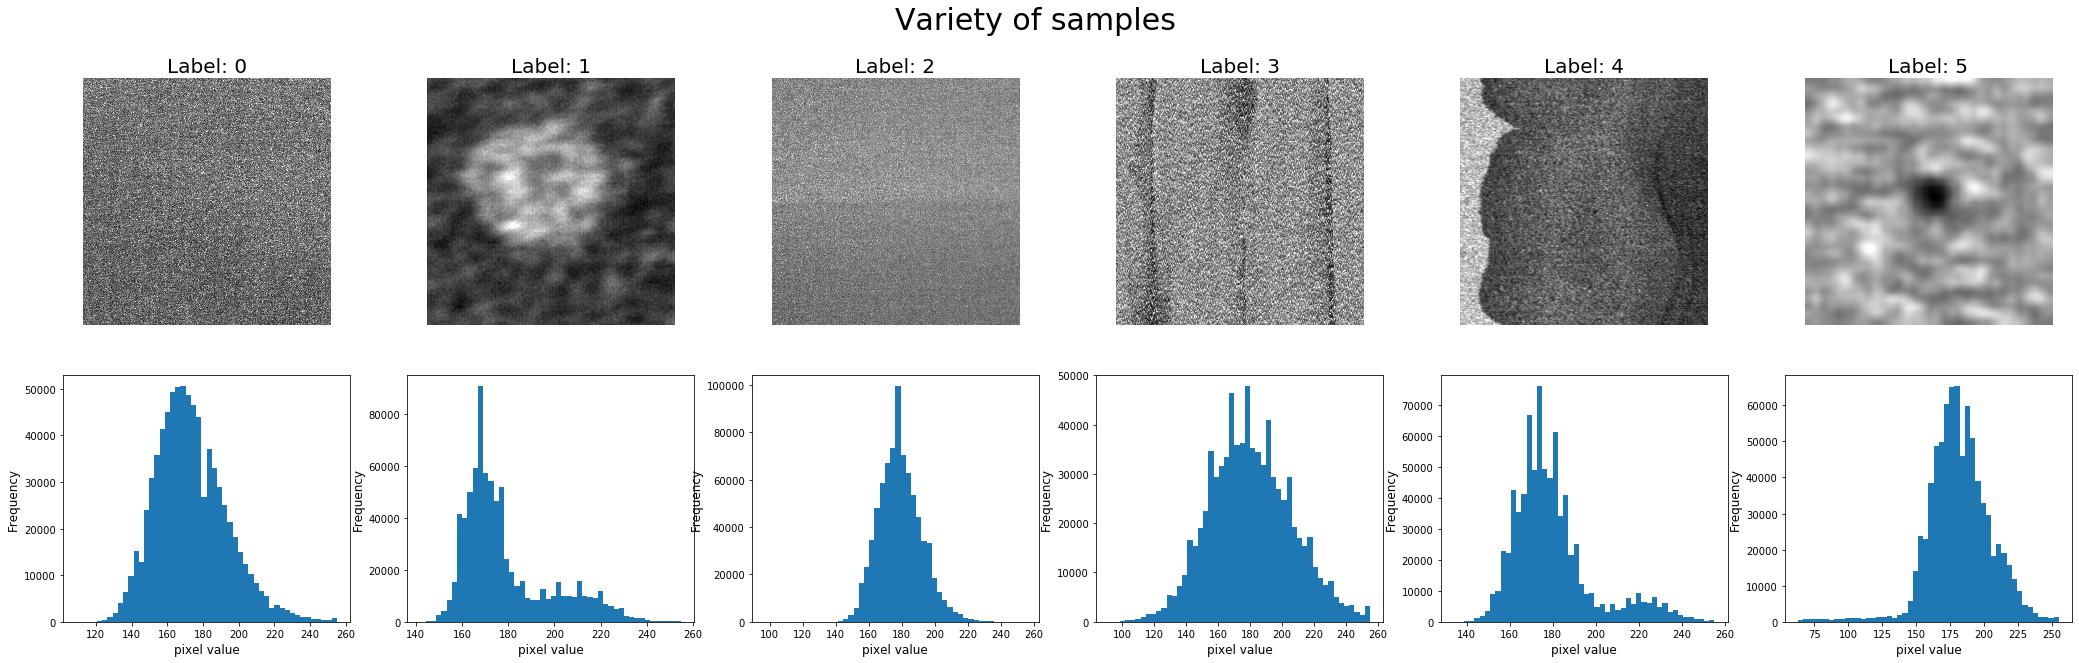

In [96]:
plt.figure(figsize=(36, 10))
for i in range(6):
    plt.subplot(2, 6, i+1)
    img = cv2.imread(label[i][i])[:,:,0]
    plt.imshow(img,cmap='gray')
    plt.axis("off")
#     plt.title(f"img shape: {img.shape}")
    plt.title(f"Label: {i}", fontsize=20)

for i in range(6):
    plt.subplot(2, 6, i+7)
    img = cv2.imread(label[i][i])
    plt.hist(img.reshape(-1), bins=50)
    plt.xlabel("pixel value", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
#     plt.xlim(50,260)
plt.suptitle(f"Variety of samples", fontsize=30)
plt.show()
# img[:,:,0].reshape(-1).shape

### 資料不平衡處理
- SMOTE + ENN

In [4]:
valid_label = pd.read_csv('C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/train(vaild_label).csv')
valid_label = valid_label.drop(['Unnamed: 0'], axis=1)
valid_label

,ID,Label,valid
0,train_00000.png,0,0
1,train_00001.png,1,1
2,train_00002.png,1,0
3,train_00003.png,5,0
4,train_00004.png,5,0
...,...,...,...
2523,train_02523.png,0,0
2524,train_02524.png,0,0
2525,train_02525.png,3,0
2526,train_02526.png,0,0


In [7]:
train_list = valid_label.loc[valid_label['valid']==0,:]
train_list.index = list(range(1767))
# train_list

,ID,Label,valid
0,train_00000.png,0,0
1,train_00002.png,1,0
2,train_00003.png,5,0
3,train_00004.png,5,0
4,train_00007.png,0,0
...,...,...,...
1762,train_02523.png,0,0
1763,train_02524.png,0,0
1764,train_02525.png,3,0
1765,train_02526.png,0,0


In [20]:
valid_list = valid_label.loc[valid_label['valid']==1,:]
valid_list.index = list(range(761))

In [6]:
os.chdir('C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/aoi/train_images') 
path = 'C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/aoi/train_images'
pixel_list = np.zeros((1767, 512*512))
pixel_list[0] = cv2.imread(train_list['ID'][0])[:,:,0].reshape((512*512))
pixel_list.shape


(1767, 262144)

In [10]:
train_list

,ID,Label,valid
0,train_00000.png,0,0
2,train_00002.png,1,0
3,train_00003.png,5,0
4,train_00004.png,5,0
7,train_00007.png,0,0
...,...,...,...
2523,train_02523.png,0,0
2524,train_02524.png,0,0
2525,train_02525.png,3,0
2526,train_02526.png,0,0


In [9]:
cv2.imread(train_list['ID'][1])[:,:,0]

KeyError: 1

In [8]:
os.chdir('C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/aoi/train_images') 
path = 'C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/aoi/train_images'

pixel_list = np.zeros((1767, 512*512))
for i in range(train_list.shape[0]):
    print(i)
    pixel_list[i] = cv2.imread(train_list['ID'][i])[:,:,0].reshape((512*512))


0
1


KeyError: 1

In [127]:
# data_pixel = pd.DataFrame(np.array(pixel_list))

# data_pixel

In [11]:
label_list = train_list['Label']

label_list

0       0
1       1
2       1
3       5
4       5
       ..
2523    0
2524    0
2525    3
2526    0
2527    5
Name: Label, Length: 2528, dtype: int64

In [ ]:
from imblearn.combine import SMOTEENN
smotenn = SMOTEENN(smote = SMOTE(), enn = EditedNearestNeighbours(sampling_strategy='all'))
x_re, y_re = smotenn.fit_resample(X, y)
  
print('Size of resampling X:', x_re.shape)
print('Size of resampling y:', y_re.shape)
print('\nImbalanced dataset: ', Counter(y))
print('Resampling dataset: ', Counter(y_re))

fig = plot_resampling(x_re, y_re, 'SMOTE + ENN')
fig.tight_layout()

### 特徵擷取(Haralick Feature Extraction)

In [ ]:
import mahotas


### 模型配適
1. (SMOTE + ENN)+ RandomForest
2. (SMOTE + ENN)+ XGBoost
3. (SMOTE + ENN)+ CNN

In [10]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models
# tf.compat.v1.set_random_seed(2019)

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(512, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1024, (3, 3), activation='relu'))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [12]:
os.chdir('C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/aoi/train_images') 
path = 'C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/aoi/train_images'
train_images = np.zeros((1767,512,512))
for i in range(1767):
#     print(i)
    train_images[i,:,:] = cv2.imread(train_list['ID'][i])[:,:,0]
train_labels = train_list['Label']

valid_images = np.zeros((761,512,512))
for i in range(761):
#     print(i)
    valid_images[i,:,:] = cv2.imread(valid_list['ID'][i])[:,:,0]
valid_labels = valid_list['Label']

In [35]:
train_labels = train_list['Label']
valid_labels = valid_list['Label']
# train_labels = np.array(train_labels).reshape((1767,))
# valid_labels = np.array(valid_labels).reshape((761,1))

In [48]:
# train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
# valid_data = tf.data.Dataset.from_tensor_slices((valid_images, valid_labels))

In [53]:
train_images = train_images.reshape(1767, 512, 512, 1)
valid_images = valid_images.reshape(761, 512, 512, 1)

In [ ]:
# input_train = input_train.reshape(len(input_train), input_shape[0], input_shape[1], input_shape[2])
# input_test  = input_test.reshape(len(input_test), input_shape[0], input_shape[1], input_shape[2])

In [55]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))
# history = model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10


ValueError: in user code:

    c:\users\meeting\appdata\local\programs\python\python36\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    c:\users\meeting\appdata\local\programs\python\python36\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\meeting\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\meeting\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\meeting\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\meeting\appdata\local\programs\python\python36\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    c:\users\meeting\appdata\local\programs\python\python36\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    c:\users\meeting\appdata\local\programs\python\python36\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\meeting\appdata\local\programs\python\python36\lib\site-packages\keras\engine\input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape (None, 512, 512, 1)
